## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
## 超參數設定
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.8,0.85,0.9,0.95,0.98]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.2f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0717 13:20:20.961256 25364 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 13:20:20.972228 25364 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 13:20:22.950937 25364 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 13:20:22.954926 25364 deprecation_wrapper.py:119] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v

Experiment with momentum = 0.80
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 13:20:23.357850 25364 deprecation.py:323] From C:\Users\a2279\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 42s 832us/step - loss: 2.1018 - acc: 0.2302 - val_loss: 1.8471 - val_acc: 0.3208
Epoch 2/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.8342 - acc: 0.3381 - val_loss: 1.8623 - val_acc: 0.3231
Epoch 3/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7292 - acc: 0.3800 - val_loss: 1.8643 - val_acc: 0.3312
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.6660 - acc: 0.4040 - val_loss: 1.7721 - val_acc: 0.3656
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.6063 - acc: 0.4239 - val_loss: 1.6105 - val_acc: 0.4189
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5740 - acc: 0.4383 - val_loss: 1.6358 - val_acc: 0.4140
Epoch 7/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5270 - acc: 0.4517 - val_loss: 1.5377 -

Epoch 2/50
50000/50000 [==============================] - 8s 153us/step - loss: 2.1220 - acc: 0.1869 - val_loss: 2.0159 - val_acc: 0.2308
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9326 - acc: 0.2922 - val_loss: 1.8678 - val_acc: 0.3126
Epoch 4/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.8467 - acc: 0.3335 - val_loss: 1.9033 - val_acc: 0.3188
Epoch 5/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.7530 - acc: 0.3696 - val_loss: 1.7339 - val_acc: 0.3779
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7054 - acc: 0.3900 - val_loss: 1.7111 - val_acc: 0.3872
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6541 - acc: 0.4083 - val_loss: 1.6635 - val_acc: 0.4114
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6247 - acc: 0.4194 - val_loss: 1.7652 - val_acc: 0.3700
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 149us/step - loss: 1.8391 - acc: 0.3303 - val_loss: 1.7762 - val_acc: 0.3677
Epoch 4/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7472 - acc: 0.3731 - val_loss: 1.7174 - val_acc: 0.3831
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6954 - acc: 0.3919 - val_loss: 1.7651 - val_acc: 0.3764
Epoch 6/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.6614 - acc: 0.4053 - val_loss: 1.6719 - val_acc: 0.3943
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6249 - acc: 0.4190 - val_loss: 1.6283 - val_acc: 0.4180
Epoch 8/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6029 - acc: 0.4254 - val_loss: 1.7161 - val_acc: 0.3957
Epoch 9/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5821 - acc: 0.4329 - val_loss: 1.6832 - val_acc: 0.3990
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 150us/step - loss: 1.8071 - acc: 0.3415 - val_loss: 1.8078 - val_acc: 0.3514
Epoch 5/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.7553 - acc: 0.3690 - val_loss: 1.7818 - val_acc: 0.3681
Epoch 6/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.7150 - acc: 0.3844 - val_loss: 1.6975 - val_acc: 0.3863
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6954 - acc: 0.3905 - val_loss: 1.7252 - val_acc: 0.3858
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6742 - acc: 0.4013 - val_loss: 1.7301 - val_acc: 0.3763
Epoch 9/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6711 - acc: 0.4045 - val_loss: 1.7200 - val_acc: 0.3834
Epoch 10/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6505 - acc: 0.4083 - val_loss: 1.6618 - val_acc: 0.4109
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 7s 147us/step - loss: 2.3051 - acc: 0.0998 - val_loss: 2.3063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.3052 - acc: 0.1005 - val_loss: 2.3087 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 2.3055 - acc: 0.0995 - val_loss: 2.3062 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.3057 - acc: 0.1008 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.3053 - acc: 0.0994 - val_loss: 2.3057 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.3054 - acc: 0.0999 - val_loss: 2.3054 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.3055 - acc: 0.0963 - val_loss: 2.3039 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==================

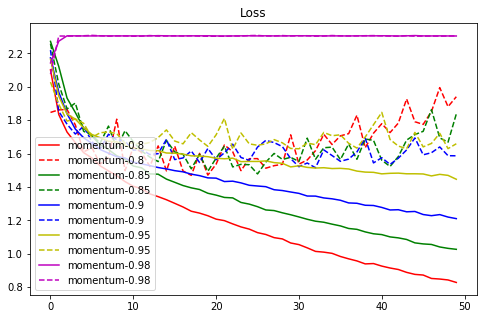

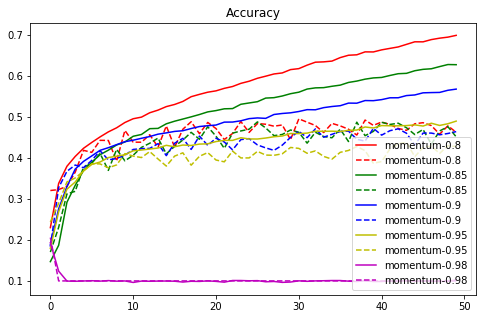

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()